<a href="https://colab.research.google.com/github/ckrkc/Exploratory-Data-Analysis/blob/main/divorce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BOŞANMA VERİLERİ İLE EDA**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving divorce.csv to divorce.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm   #Regresyon analizi için.


In [3]:
data=pd.read_csv("divorce.csv")

In [4]:
print(data.head())

  divorce_date     dob_man education_man  income_man   dob_woman  \
0   2006-09-06  1975-12-18     Secondary      2000.0  1983-08-01   
1   2008-01-02  1976-11-17  Professional      6000.0  1977-03-13   
2   2011-01-02  1969-04-06   Preparatory      5000.0  1970-02-16   
3   2011-01-02  1979-11-13     Secondary     12000.0  1981-05-13   
4   2011-01-02  1982-09-20  Professional      6000.0  1988-01-30   

  education_woman  income_woman marriage_date  marriage_duration  num_kids  
0       Secondary        1800.0    2000-06-26                5.0       1.0  
1    Professional        6000.0    2001-09-02                7.0       NaN  
2    Professional        5000.0    2000-02-02                2.0       2.0  
3       Secondary       12000.0    2006-05-13                2.0       NaN  
4    Professional       10000.0    2007-08-06                3.0       NaN  


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   divorce_date       2209 non-null   object 
 1   dob_man            2209 non-null   object 
 2   education_man      2205 non-null   object 
 3   income_man         2209 non-null   float64
 4   dob_woman          2209 non-null   object 
 5   education_woman    2209 non-null   object 
 6   income_woman       2209 non-null   float64
 7   marriage_date      2209 non-null   object 
 8   marriage_duration  2209 non-null   float64
 9   num_kids           1333 non-null   float64
dtypes: float64(4), object(6)
memory usage: 172.7+ KB
None


In [6]:
print(data.describe())

         income_man  income_woman  marriage_duration     num_kids
count   2209.000000   2209.000000        2209.000000  1333.000000
mean    7922.986410   6793.164545           9.606609     1.672918
std     7693.796497   6562.928689           7.266696     0.732858
min        3.000000      3.500000           1.000000     1.000000
25%     3600.000000   3000.000000           4.000000     1.000000
50%     6000.000000   5000.000000           8.000000     2.000000
75%    10000.000000   8000.000000          14.000000     2.000000
max    80000.000000  90000.000000          32.000000     5.000000


In [7]:
#Tarih sütunlarını datetime formatına çevirme
data["divorce_date"]=pd.to_datetime(data["divorce_date"])
data["dob_man"]=pd.to_datetime(data["dob_man"])
data["dob_woman"]=pd.to_datetime(data["dob_woman"])
data["marriage_date"]=pd.to_datetime(data["marriage_date"])

In [8]:
#Eksik verileri bulma
print(data.isnull().sum())

#Eksik değer yüzdesi
print(data.isnull().mean()*100)

divorce_date           0
dob_man                0
education_man          4
income_man             0
dob_woman              0
education_woman        0
income_woman           0
marriage_date          0
marriage_duration      0
num_kids             876
dtype: int64
divorce_date          0.000000
dob_man               0.000000
education_man         0.181077
income_man            0.000000
dob_woman             0.000000
education_woman       0.000000
income_woman          0.000000
marriage_date         0.000000
marriage_duration     0.000000
num_kids             39.655953
dtype: float64


In [20]:
#education_man sütunundaki eksik verileri doldur
data["education_man"].fillna(data["education_man"].mode()[0], inplace=True)

#num_kids sütunundaki eksik verileri doldur
data["num_kids"].fillna(data["num_kids"].mean(), inplace=True)

<ipython-input-20-4b6e6f7df2e4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["education_man"].fillna(data["education_man"].mode()[0], inplace=True)
<ipython-input-20-4b6e6f7df2e4>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

In [21]:
data.isnull().sum()

,0
divorce_date,0
dob_man,0
education_man,0
income_man,0
dob_woman,0
education_woman,0
income_woman,0
marriage_date,0
marriage_duration,0
num_kids,0


In [22]:
#Yalnızca sayısal sütunları seçme
numeric_data = data.select_dtypes(include=[np.number])

#Korelasyon matrisini hesaplama
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

                   income_man  income_woman  marriage_duration  num_kids
income_man           1.000000      0.318047           0.085321  0.032653
income_woman         0.318047      1.000000           0.078677 -0.015379
marriage_duration    0.085321      0.078677           1.000000  0.347479
num_kids             0.032653     -0.015379           0.347479  1.000000


<Axes: >

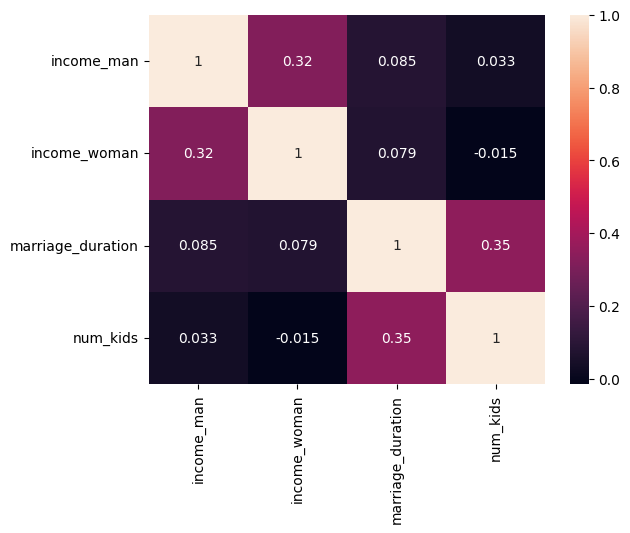

In [23]:
sns.heatmap(correlation_matrix, annot=True)

## Regresyon Analizi

In [24]:
#Eksik değer kontrolü
print(data.isnull().sum())


divorce_date         0
dob_man              0
education_man        0
income_man           0
dob_woman            0
education_woman      0
income_woman         0
marriage_date        0
marriage_duration    0
num_kids             0
dtype: int64


In [25]:
#Bağımlı ve bağımsız değişkenler

bagimli=data["marriage_duration"]
bagimsiz=data[["income_man", "income_woman", "num_kids"]]

In [26]:
#Bağımsız değişkenlere sabit ekle(intercept için)
bagimsiz=sm.add_constant(bagimsiz)

#Modeli oluştur ve eğit
model=sm.OLS(bagimli,bagimsiz).fit()

#Model özetini yazdır
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      marriage_duration   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     110.1
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           1.97e-66
Time:                        19:42:35   Log-Likelihood:                -7360.9
No. Observations:                2209   AIC:                         1.473e+04
Df Residuals:                    2205   BIC:                         1.475e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.3004      0.483      2.693   